# Lektion 5 - Übung 2

Import von Python-Bibliotheken und notwendiger Code für diverse Funktionen

In [1]:
## imports
import math
import pandas as pd
from IPython.display import HTML, display


## Der folgende Code dient zur Implementierung der Funktionalität, damit Code ein- und ausgeblendet werden kann.
def toggle_code():
    toggle_code_js_html = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Code ein-/ausblenden"></form>
    '''
    display(HTML(toggle_code_js_html))


toggle_code()

# Aufgabentext

Im Finanzbereich wird häufig die Annahme getroffen, dass Renditen von Wertpapieren normalverteilt sind. Damit können die Renditen als Zufallsvariable X aufgefasst werden, der Erwartungswert $\mu$ gibt die erwartete Rendite an, während die Standardabweichung $\sigma$ die Schwankungen der Rendite und damit das Risiko anzeigt.  

Angenommen, es gibt drei Aktien A, B und C. Die Renditen der Aktie A sind normalverteilt mit N(44%;22%), die Renditen der Aktie B sind normalverteilt mit N(36%;20%) und für Aktie C gilt N(10%;4%). Wie hoch ist die Wahrscheinlichkeit, dass ein Anleger bei der Investition in eine einzelne Aktie einen Verlust (Rendite ist kleiner als null) erleidet?

# Lösung

In [2]:
from scipy.stats import norm

Gesucht ist  
für A: P(X<0) bei N(0.44, 0.22).  
für B: P(X<0) bei N(0.36, 0.20).  
für C: P(X<0) bei N(0.1, 0.04).  

### Aktie A

**Wie hoch ist die Wahrscheinlichkeit, dass bei Investition in A ein Verlust auftritt?**

Gesuchte Wahrscheinlichkeit:
$$ P(Z < z) = F_{St}(z) $$
mit $z = 0$, $ \mu = 0.44 $ und $ \sigma = 0.22 $

In [3]:
# z-Transformation
z = (0 - 0.44) / 0.22
print(z)

-2.0


In [4]:
# P(Z < z) = F(z)
norm.cdf(z)

0.022750131948179195

### Aktie B

**Wie hoch ist die Wahrscheinlichkeit, dass bei Investition in B ein Verlust auftritt?**

Gesuchte Wahrscheinlichkeit:
$$ P(Z < z) = F_{St}(z) $$
mit $z = 0$, $ \mu = 0.36 $ und $ \sigma = 0.2 $

In [5]:
# z-Transformation
z = (0 - 0.36) / 0.2
print(z)

-1.7999999999999998


In [6]:
# P(Z < z) = F(z)
norm.cdf(z)

0.03593031911292581

### Aktie C

**Wie hoch ist die Wahrscheinlichkeit, dass bei Investition in C ein Verlust auftritt?**

Gesuchte Wahrscheinlichkeit:
$$ P(Z < z) = F_{St}(z) $$
mit $z = 0$, $ \mu = 0.1 $ und $ \sigma = 0.04 $

In [7]:
# z-Transformation
z = (0 - 0.1) / 0.04
print(z)

-2.5


In [8]:
# P(Z < z) = F(z)
norm.cdf(z)

0.006209665325776132

# Grafik: Dichtefunktionen

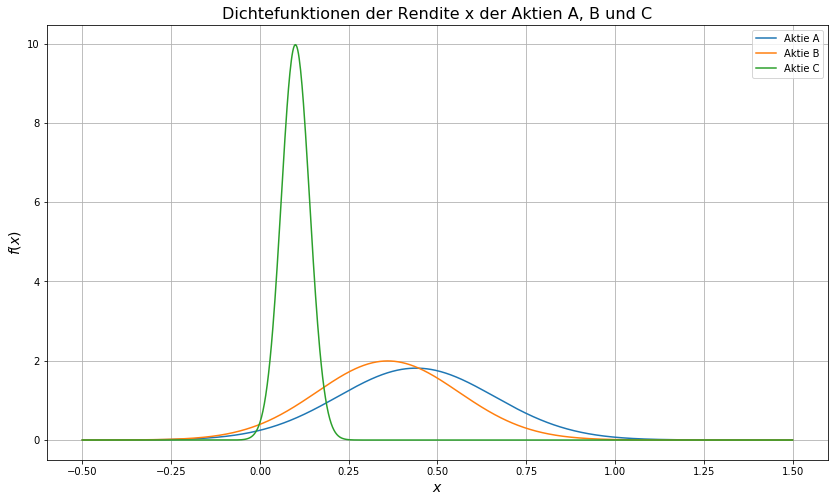

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 8))

## A
x_values = np.linspace(-0.5, 1.5, 1000)
y_values = [norm.pdf(i, loc=0.44, scale=0.22) for i in x_values]
ax.plot(x_values, y_values, label='Aktie A')

## B
x_values = np.linspace(-0.5, 1.5, 1000)
y_values = [norm.pdf(i, loc=0.36, scale=0.2) for i in x_values]
ax.plot(x_values, y_values, label='Aktie B')

## C
x_values = np.linspace(-0.5, 1.5, 1000)
y_values = [norm.pdf(i, loc=0.1, scale=0.04) for i in x_values]
ax.plot(x_values, y_values, label='Aktie C')

ax.set_title('Dichtefunktionen der Rendite x der Aktien A, B und C', size=16)
ax.set_xlabel('$x$', size=14)
ax.set_ylabel('$f(x)$', size=14)

ax.grid(True, axis='both')

#ax.set_xticks(np.linspace(-3, 3, 13))
#ax.set_xticklabels(x_labels)

#ax.set_yticks(np.linspace(0.0, 1.0, 11))

## Wert neben Linie schreiben
#for x, y in zip(x_values, y_values):
#    ax.annotate(str(y), xy=(x, y - 0.04), size=14)

#major_ticks = np.arange(0, 1.1, 0.1)    
#ax.set_yticks(major_ticks)

plt.legend()

plt.show()
toggle_code()

# Interaktive Grafik
## Wahrscheinlichkeit für einen Verlust

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline


def make_plot(mu, sigma):
    fig, ax = plt.subplots(figsize=(14, 8))

    x_values = np.linspace(-0.5, 1.5, 1000)
    y_values = [norm.pdf(i, loc=mu, scale=sigma) for i in x_values]
    ax.plot(x_values, y_values, label='Aktie A')

    ax.set_title('Dichtefunktion für $\mu$={:.2f} und $\sigma$={:.2f} und Wahrscheinlichkeit für Verlust, d.h. P(X)<0'.format(
                    mu, sigma),
                 size=16)
    ax.set_xlabel('$x$', size=14)
    ax.set_ylabel('$f(x)$', size=14)

    ax.grid(True, axis='both')

    ## Linie bei x=0
    x = 0
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.vlines(x, 0, y)
    
    ## Text für Ergebnis
    p_verlust = norm.cdf(x, loc=mu, scale=sigma)
    plt.annotate(
        'P(X<0) = {:.4f}'.format(p_verlust),
        size=14,
        xy=(0.1, 0.1)
    )    
    
    ## Fläche markieren
    xs = np.linspace(-0.5, 0, 250)
    ys1 = [0 for i in xs]
    ys2 = [norm.pdf(i, loc=mu, scale=sigma) for i in xs]
    plt.fill_between(x=xs, y1=ys1, y2=ys2, color='yellow')


toggle_code()

In [11]:
interactive(
    make_plot, 
    mu=widgets.FloatSlider(value=0.44, min=0.01, max=0.5, step=0.01, continuous_update=False, description='$\mu$'),
    sigma=widgets.FloatSlider(value=0.22, min=0.01, max=0.5, step=0.01, continuous_update=False, description='$\sigma$'))

interactive(children=(FloatSlider(value=0.44, continuous_update=False, description='$\\mu$', max=0.5, min=0.01…